In [1]:
import pandas as pd
df = pd.read_csv("income.csv");
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline 

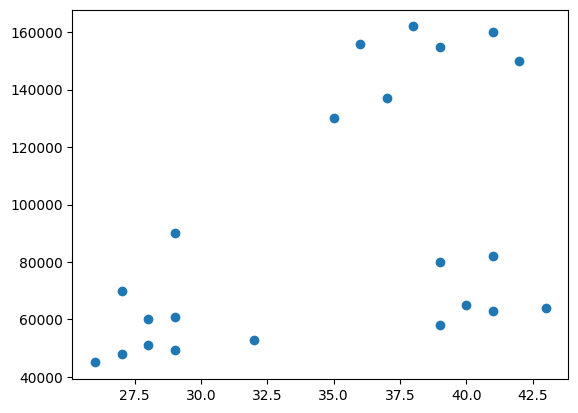

In [4]:
plt.scatter(df.Age,df['Income($)'])

In [8]:
k = KMeans(n_clusters=3)
k

KMeans(n_clusters=3)

In [9]:
y_predicted = k.fit_predict(df[['Age',"Income($)"]])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [10]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


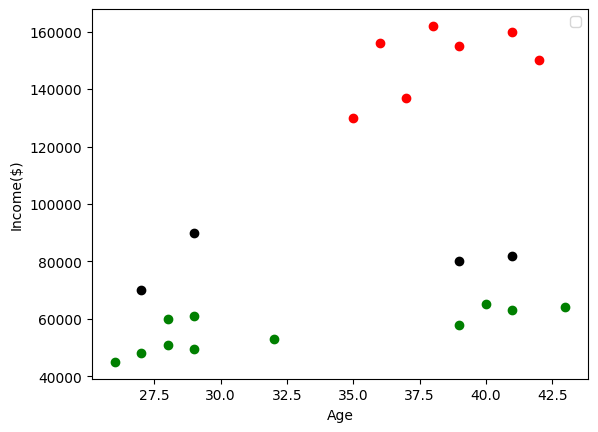

In [12]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age,df1["Income($)"],color='black')
plt.scatter(df2.Age,df2["Income($)"],color='red')
plt.scatter(df3.Age,df3["Income($)"],color='green')

plt.xlabel("Age")
plt.ylabel("Income($)")
plt.legend()

In [25]:
scaler = MinMaxScaler()
scaler.fit(df[["Income($)"]])
df['Income($)']= scaler.transform(df[['Income($)']])

scaler.fit(df[["Age"]])
df['Age']= scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [41]:
k = KMeans(n_clusters=3)
y_predicted = k.fit_predict(df[['Age',"Income($)"]])
df['cluster']=y_predicted
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

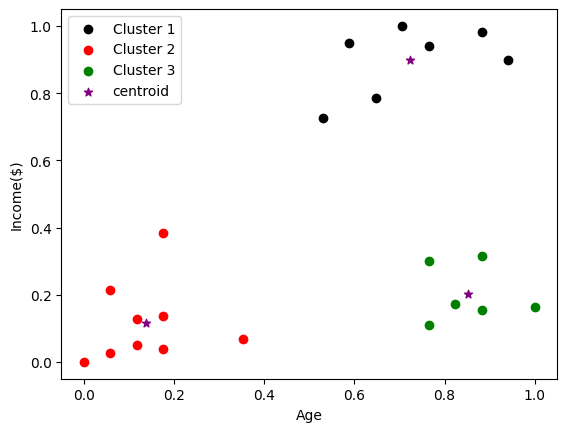

In [45]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age,df1["Income($)"],color='black',label='Cluster 1')
plt.scatter(df2.Age,df2["Income($)"],color='red',label='Cluster 2')
plt.scatter(df3.Age,df3["Income($)"],color='green',label='Cluster 3')

plt.scatter(k.cluster_centers_[:,0],k.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.xlabel("Age")
plt.ylabel("Income($)")
plt.legend()

In [30]:
k.cluster_centers_
#it gives us the centroids of clusters c1,c2,and c3

array([[0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428]])

In [38]:
sse = []
for k in range(1,10):
    k = KMeans(n_clusters=k)
    k.fit(df[['Age',"Income($)"]])
    sse.append(k.inertia_)

In [39]:
sse

[5.434011511988176,
 2.0911363886990766,
 0.47507834985530945,
 0.34910470944195643,
 0.26217927623452125,
 0.21578607765873017,
 0.16858512236029757,
 0.1378188013376402,
 0.10188787724979426]

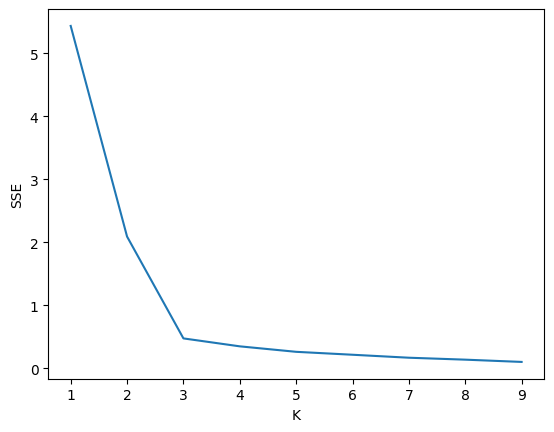

In [40]:
plt.xlabel("K")
plt.ylabel("SSE")
plt.plot(range(1,10),sse)